In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.preprocessing import image
from keras.optimizers import RMSprop, adam, SGD
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

# PREPROCESSING

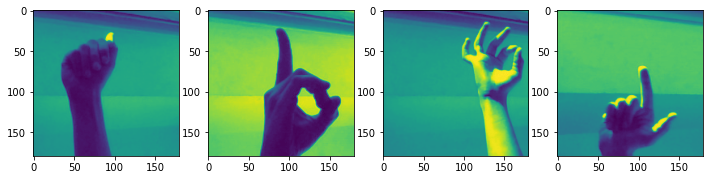

In [14]:
try:
    imgs = cv2.imread(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train\A\A700.jpg')
    imgs1 = cv2.imread(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train\D\D40.jpg')
    imgs2 = cv2.imread(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train\F\F400.jpg')
    imgs3 = cv2.imread(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train\L\L600.jpg')
except:
    print('error')

img = imgs.copy()
crop = img_bw[8:188,8:188]

img3 = imgs1.copy()
img_bw3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
crop3 = img_bw3[8:188,8:188]

img4 = imgs2.copy()
img_bw4 = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
crop4 = img_bw4[8:188,8:188]

img5 = imgs3.copy()
img_bw5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)
crop5 = img_bw5[8:188,8:188]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,12))
ax[0].imshow(crop)
ax[1].imshow(crop3)
ax[2].imshow(crop4)
ax[3].imshow(crop5)

In [3]:
def grfunc(x):
    img_bw = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    return img_bw

In [15]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                    featurewise_center=True,
                                    width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                    featurewise_std_normalization=True,
                                    shear_range=0.1,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest',
                                    brightness_range =(0.5,1)
                                 )

test_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range = 0.05,
                                  height_shift_range = 0.05,
                                  featurewise_center=True, 
                                  featurewise_std_normalization=True,
                                  horizontal_flip = True,
                                  shear_range=0.1,
                                  fill_mode = 'nearest',
                                  brightness_range =(0.5,1)
                                 )

C:\Users\hp\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


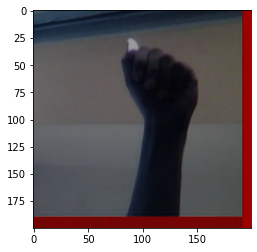

In [5]:
imga_array = train_datagen.random_transform(img)
imga_array = imga_array.astype(np.int)
plt.imshow(imga_array)

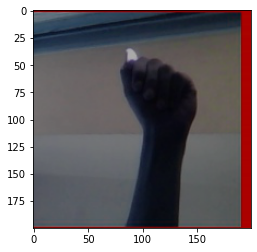

In [6]:
imga_array = test_datagen.random_transform(img)
imga_array = imga_array.astype(np.int)
plt.imshow(imga_array)

# START MAKING MODEL

In [22]:
Model = Sequential()

Model.add(Conv2D(filters = 16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(200,200,3)))
Model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

Model.add(Conv2D(filters = 32, kernel_size=(3,3), padding='valid', activation='relu'))
Model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

Model.add(Conv2D(filters = 64, kernel_size=(3,3), padding='valid', activation='relu'))

Model.add(Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1), padding='same', activation='relu'))
Model.add(Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1), padding='same', activation='relu'))
Model.add(Flatten())

Model.add(Dense(512,activation='relu'))
Model.add(Dropout(0.5, input_shape=(512,)))
Model.add(Dense(512,activation='relu'))

Model.add(Dense(30, activation='softmax'))

In [23]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 64)       

In [14]:
Model.compile(loss="categorical_crossentropy", optimizer= RMSprop(learning_rate=0.001), metrics=['acc'])

In [10]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train',
                                                   target_size = (200,200),
                                                   batch_size = 50,
                                                   class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_test',
                                                   target_size = (200,200),
                                                   batch_size = 20,
                                                   class_mode = 'categorical')

Found 85972 images belonging to 30 classes.
Found 18000 images belonging to 30 classes.


In [11]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28,
 'stop': 29}

In [12]:
class mycallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc') >= 0.95):
            print('\nReached almost 95% accuracy so cancelling training !')
            self.model.stop_training = True

callbacks = mycallback()

In [15]:
history = Model.fit_generator(train_generator,
                             steps_per_epoch=4,
                             epochs=1000,
                             verbose=1,
                              callbacks = [callbacks],
                             validation_data = test_generator,
                             validation_steps = 2)

Epoch 1/1000


C:\Users\hp\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hp\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2/2 [==============================] - 14s 7s/step - loss: 3.4002 - acc: 0.0400 - val_loss: 3.4076 - val_acc: 0.0500
Epoch 2/1000
2/2 [==============================] - 9s 5s/step - loss: 3.4077 - acc: 0.0400 - val_loss: 3.4184 - val_acc: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 14s 7s/step - loss: 3.4102 - acc: 0.0300 - val_loss: 3.3917 - val_acc: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 9s 5s/step - loss: 3.3976 - acc: 0.0200 - val_loss: 3.4085 - val_acc: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 10s 5s/step - loss: 3.4029 - acc: 0.0400 - val_loss: 3.4119 - val_acc: 0.0500
Epoch 6/1000
2/2 [==============================] - 9s 5s/step - loss: 3.4089 - acc: 0.0300 - val_loss: 3.4002 - val_acc: 0.0500
Epoch 7/1000
2/2 [==============================] - 9s 5s/step - loss: 3.3943 - acc: 0.0600 - val_loss: 3.3948 - val_acc: 0.0000e+00
Epoch 8/1000
2/2 [==============================] - 9s 5s/step - loss: 3.4031 - acc: 0.0300

2/2 [==============================] - 17s 8s/step - loss: 3.1521 - acc: 0.0700 - val_loss: 3.1058 - val_acc: 0.1000
Epoch 126/1000
2/2 [==============================] - 10s 5s/step - loss: 3.1067 - acc: 0.1500 - val_loss: 3.0262 - val_acc: 0.1750
Epoch 127/1000
2/2 [==============================] - 9s 5s/step - loss: 2.9340 - acc: 0.1800 - val_loss: 2.9153 - val_acc: 0.1500
Epoch 128/1000
2/2 [==============================] - 9s 5s/step - loss: 3.1529 - acc: 0.1500 - val_loss: 3.1643 - val_acc: 0.1000
Epoch 129/1000
2/2 [==============================] - 14s 7s/step - loss: 3.0912 - acc: 0.1000 - val_loss: 2.7767 - val_acc: 0.1750
Epoch 130/1000
2/2 [==============================] - 16s 8s/step - loss: 3.1156 - acc: 0.1300 - val_loss: 3.0958 - val_acc: 0.1750
Epoch 131/1000
2/2 [==============================] - 11s 6s/step - loss: 3.1638 - acc: 0.1000 - val_loss: 2.8500 - val_acc: 0.2250
Epoch 132/1000
2/2 [==============================] - 9s 5s/step - loss: 3.1237 - acc: 0.1100

2/2 [==============================] - 16s 8s/step - loss: 2.1995 - acc: 0.3500 - val_loss: 1.8820 - val_acc: 0.3750
Epoch 250/1000
2/2 [==============================] - 16s 8s/step - loss: 2.0752 - acc: 0.3600 - val_loss: 1.7103 - val_acc: 0.3750
Epoch 251/1000
2/2 [==============================] - 13s 6s/step - loss: 2.0025 - acc: 0.3600 - val_loss: 2.1515 - val_acc: 0.3000
Epoch 252/1000
2/2 [==============================] - 11s 5s/step - loss: 2.1020 - acc: 0.3200 - val_loss: 2.4420 - val_acc: 0.3250
Epoch 253/1000
2/2 [==============================] - 12s 6s/step - loss: 2.2298 - acc: 0.2900 - val_loss: 2.1269 - val_acc: 0.2500
Epoch 254/1000
2/2 [==============================] - 13s 7s/step - loss: 1.9690 - acc: 0.4300 - val_loss: 2.2917 - val_acc: 0.2250
Epoch 255/1000
2/2 [==============================] - 9s 5s/step - loss: 2.2767 - acc: 0.3100 - val_loss: 2.5048 - val_acc: 0.5250
Epoch 256/1000
2/2 [==============================] - 13s 7s/step - loss: 2.0469 - acc: 0.40

2/2 [==============================] - 11s 5s/step - loss: 1.8882 - acc: 0.4100 - val_loss: 1.0798 - val_acc: 0.5750
Epoch 374/1000
2/2 [==============================] - 13s 7s/step - loss: 1.6884 - acc: 0.4800 - val_loss: 1.9494 - val_acc: 0.5250
Epoch 375/1000
2/2 [==============================] - 13s 7s/step - loss: 1.6608 - acc: 0.4500 - val_loss: 1.3617 - val_acc: 0.6500
Epoch 376/1000
2/2 [==============================] - 9s 5s/step - loss: 1.6367 - acc: 0.4400 - val_loss: 1.7982 - val_acc: 0.5250
Epoch 377/1000
2/2 [==============================] - 11s 5s/step - loss: 1.5199 - acc: 0.5400 - val_loss: 1.7962 - val_acc: 0.5250
Epoch 378/1000
2/2 [==============================] - 16s 8s/step - loss: 1.1491 - acc: 0.5900 - val_loss: 1.4789 - val_acc: 0.5500
Epoch 379/1000
2/2 [==============================] - 16s 8s/step - loss: 1.3101 - acc: 0.5900 - val_loss: 1.2532 - val_acc: 0.5250
Epoch 380/1000
2/2 [==============================] - 11s 6s/step - loss: 1.2744 - acc: 0.60

2/2 [==============================] - 13s 7s/step - loss: 1.0810 - acc: 0.6900 - val_loss: 0.9943 - val_acc: 0.6250
Epoch 498/1000
2/2 [==============================] - 16s 8s/step - loss: 0.9556 - acc: 0.6100 - val_loss: 0.7220 - val_acc: 0.7000
Epoch 499/1000
2/2 [==============================] - 15s 8s/step - loss: 0.9820 - acc: 0.6900 - val_loss: 1.2419 - val_acc: 0.6250
Epoch 500/1000
2/2 [==============================] - 15s 8s/step - loss: 1.2215 - acc: 0.5800 - val_loss: 0.8886 - val_acc: 0.6750
Epoch 501/1000
2/2 [==============================] - 15s 7s/step - loss: 1.2910 - acc: 0.6000 - val_loss: 1.1872 - val_acc: 0.6250
Epoch 502/1000
2/2 [==============================] - 9s 4s/step - loss: 0.8842 - acc: 0.6500 - val_loss: 0.8080 - val_acc: 0.6250
Epoch 503/1000
2/2 [==============================] - 9s 5s/step - loss: 0.9501 - acc: 0.7100 - val_loss: 0.7425 - val_acc: 0.7000
Epoch 504/1000
2/2 [==============================] - 13s 7s/step - loss: 1.2795 - acc: 0.570

2/2 [==============================] - 12s 6s/step - loss: 0.7418 - acc: 0.7000 - val_loss: 1.0179 - val_acc: 0.6500
Epoch 622/1000
2/2 [==============================] - 10s 5s/step - loss: 1.1103 - acc: 0.5900 - val_loss: 1.1967 - val_acc: 0.7500
Epoch 623/1000
2/2 [==============================] - 9s 5s/step - loss: 0.8409 - acc: 0.6700 - val_loss: 1.1258 - val_acc: 0.6000
Epoch 624/1000
2/2 [==============================] - 12s 6s/step - loss: 0.9416 - acc: 0.7200 - val_loss: 1.2348 - val_acc: 0.6250
Epoch 625/1000
2/2 [==============================] - 16s 8s/step - loss: 0.8955 - acc: 0.7100 - val_loss: 0.8350 - val_acc: 0.7500
Epoch 626/1000
2/2 [==============================] - 16s 8s/step - loss: 0.8988 - acc: 0.6700 - val_loss: 0.4024 - val_acc: 0.8750
Epoch 627/1000
2/2 [==============================] - 10s 5s/step - loss: 0.9994 - acc: 0.6600 - val_loss: 1.4985 - val_acc: 0.5750
Epoch 628/1000
2/2 [==============================] - 9s 5s/step - loss: 0.9716 - acc: 0.700

2/2 [==============================] - 18s 9s/step - loss: 0.5266 - acc: 0.8500 - val_loss: 0.5467 - val_acc: 0.8750
Epoch 746/1000
2/2 [==============================] - 10s 5s/step - loss: 1.0298 - acc: 0.6700 - val_loss: 0.9177 - val_acc: 0.8250
Epoch 747/1000
2/2 [==============================] - 12s 6s/step - loss: 0.9120 - acc: 0.6700 - val_loss: 0.8297 - val_acc: 0.7500
Epoch 748/1000
2/2 [==============================] - 17s 9s/step - loss: 0.7285 - acc: 0.7600 - val_loss: 0.8393 - val_acc: 0.7750
Epoch 749/1000
2/2 [==============================] - 11s 5s/step - loss: 1.0045 - acc: 0.6400 - val_loss: 0.6596 - val_acc: 0.8250
Epoch 750/1000
2/2 [==============================] - 19s 9s/step - loss: 0.6890 - acc: 0.7700 - val_loss: 0.6831 - val_acc: 0.7500
Epoch 751/1000
2/2 [==============================] - 15s 7s/step - loss: 0.6335 - acc: 0.8500 - val_loss: 0.5624 - val_acc: 0.8500
Epoch 752/1000
2/2 [==============================] - 16s 8s/step - loss: 1.0198 - acc: 0.7

2/2 [==============================] - 17s 8s/step - loss: 0.8690 - acc: 0.7500 - val_loss: 0.5334 - val_acc: 0.8500
Epoch 870/1000
2/2 [==============================] - 13s 6s/step - loss: 0.5087 - acc: 0.8100 - val_loss: 1.0266 - val_acc: 0.7500
Epoch 871/1000
2/2 [==============================] - 10s 5s/step - loss: 0.9036 - acc: 0.6800 - val_loss: 0.5105 - val_acc: 0.8250
Epoch 872/1000
2/2 [==============================] - 11s 6s/step - loss: 0.8345 - acc: 0.6700 - val_loss: 0.3836 - val_acc: 0.9250
Epoch 873/1000
2/2 [==============================] - 17s 8s/step - loss: 0.7593 - acc: 0.7400 - val_loss: 0.6041 - val_acc: 0.8250
Epoch 874/1000
2/2 [==============================] - 17s 8s/step - loss: 0.5808 - acc: 0.7800 - val_loss: 0.7453 - val_acc: 0.7750
Epoch 875/1000
2/2 [==============================] - 14s 7s/step - loss: 0.4127 - acc: 0.8400 - val_loss: 0.4153 - val_acc: 0.9000
Epoch 876/1000
2/2 [==============================] - 12s 6s/step - loss: 0.8347 - acc: 0.8

2/2 [==============================] - 17s 8s/step - loss: 0.6141 - acc: 0.7700 - val_loss: 0.3457 - val_acc: 0.8750
Epoch 994/1000
2/2 [==============================] - 17s 8s/step - loss: 0.5435 - acc: 0.8300 - val_loss: 0.2783 - val_acc: 0.9000
Epoch 995/1000
2/2 [==============================] - 16s 8s/step - loss: 0.5306 - acc: 0.8100 - val_loss: 0.6284 - val_acc: 0.8250
Epoch 996/1000
2/2 [==============================] - 15s 7s/step - loss: 0.6107 - acc: 0.7700 - val_loss: 0.2338 - val_acc: 0.8750
Epoch 997/1000
2/2 [==============================] - 9s 5s/step - loss: 0.5792 - acc: 0.8400 - val_loss: 0.3619 - val_acc: 0.8500
Epoch 998/1000
2/2 [==============================] - 11s 6s/step - loss: 0.5686 - acc: 0.8100 - val_loss: 0.9005 - val_acc: 0.8000
Epoch 999/1000
2/2 [==============================] - 17s 8s/step - loss: 0.7786 - acc: 0.7500 - val_loss: 0.8922 - val_acc: 0.6500
Epoch 1000/1000
2/2 [==============================] - 14s 7s/step - loss: 0.6731 - acc: 0.8

# VISUALIZE TRAINING HISTORY

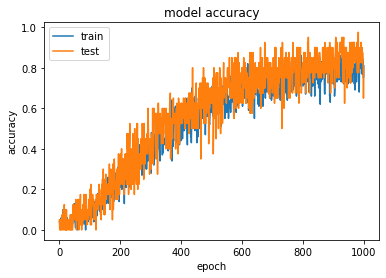

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

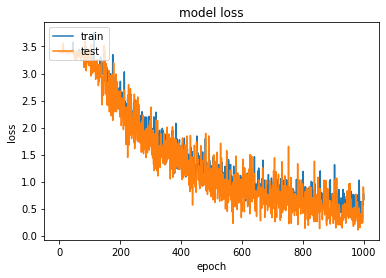

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PREDICT TEST RESULT

In [16]:
test = os.listdir(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test')
result = []
for j in test:
    img = image.load_img(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test\{}'.format(j), target_size=(200, 200,1))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = Model.predict_classes(images, batch_size=10)
    result.append(classes[0])

In [17]:
actual = []
for i in test:
    name = i.split('_')[0]
    num = train_generator.class_indices[name]
    actual.append(num)

# EVALUATION MODEL PERFORMANCE 

In [34]:
cnn_confusion_matrix = confusion_matrix(actual,result)
c_r = classification_report(np.array(actual),np.array(result))
print(c_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       0.33      1.00      0.50         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [35]:
print(cnn_confusion_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

In [38]:
dic_alpha = {value : key for key, value in train_generator.class_indices.items()}

In [39]:
dic_alpha

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z',
 26: 'del',
 27: 'nothing',
 28: 'space',
 29: 'stop'}

In [75]:
img = image.load_img(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test\V_test.jpg', target_size=(200, 200,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = Model.predict_classes(images, batch_size=10)
print(dic_alpha[classes[0]])

K


# SAVE MODEL AND MODEL"S WEIGHTS

In [ ]:
model.save('Model.h5')
model.save_weights('Model_weight.h5')

# Train pre-train model for good accuracy

In [206]:
model = keras.models.load_model(r'C:\Users\hp\Desktop\sign-language\Model.h5')

In [207]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                    zca_whitening=True,
                                    featurewise_center=True,
                                    width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                    featurewise_std_normalization=True,
                                    shear_range=0.1,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  brightness_range =(0.5,1)
                                 )

test_datagen = ImageDataGenerator(rescale=1./255,
                                  zca_whitening=True,
                                  width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                  featurewise_center=True, 
                                    featurewise_std_normalization=True,
                                  horizontal_flip = True,
                                    shear_range=0.1,
                                  fill_mode = 'nearest',
                                  brightness_range =(0.5,1)
                                 )

In [208]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)       

In [86]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train',
                                                   target_size = (200,200),
                                                   batch_size = 100,
                                                   class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_test',
                                                   target_size = (200,200),
                                                   batch_size = 20,
                                                   class_mode = 'categorical')

Found 86282 images belonging to 30 classes.
Found 18000 images belonging to 30 classes.


In [87]:
class mycallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>0.90):
            print('\nReached almost 100% accuracy so cancelling training !')
            self.model.stop_training = True

callbacks = mycallback()

In [88]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=2,
                             epochs=1000,
                             verbose=1,
                              callbacks = [callbacks],
                             validation_data = test_generator,
                             validation_steps = 2)

Epoch 1/1000
2/2 [==============================] - 84s 42s/step - loss: 0.6884 - acc: 0.7650 - val_loss: 0.4904 - val_acc: 0.9250
Epoch 2/1000
2/2 [==============================] - 16s 8s/step - loss: 0.6117 - acc: 0.8250 - val_loss: 0.1191 - val_acc: 0.9250
Epoch 3/1000
2/2 [==============================] - 15s 8s/step - loss: 0.6730 - acc: 0.8000 - val_loss: 0.2858 - val_acc: 0.7750
Epoch 4/1000
2/2 [==============================] - 16s 8s/step - loss: 0.6353 - acc: 0.8100 - val_loss: 0.2760 - val_acc: 0.8500
Epoch 5/1000
2/2 [==============================] - 16s 8s/step - loss: 0.8895 - acc: 0.7850 - val_loss: 0.7070 - val_acc: 0.8250
Epoch 6/1000
2/2 [==============================] - 17s 8s/step - loss: 0.6038 - acc: 0.8050 - val_loss: 0.4614 - val_acc: 0.8500
Epoch 7/1000
2/2 [==============================] - 19s 9s/step - loss: 0.5890 - acc: 0.8350 - val_loss: 0.2817 - val_acc: 0.9000
Epoch 8/1000
2/2 [==============================] - 16s 8s/step - loss: 0.6363 - acc: 0.7

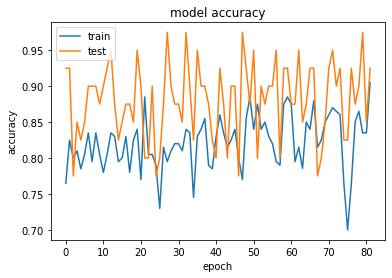

In [89]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

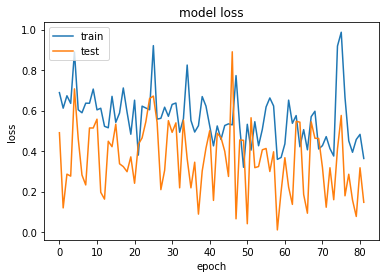

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
test = os.listdir(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test')
result = []
for j in test:
    img = image.load_img(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test\{}'.format(j), target_size=(200, 200,1))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    result.append(classes[0])

In [92]:
actual = []
for i in test:
    name = i.split('_')[0]
    num = train_generator.class_indices[name]
    actual.append(num)

In [93]:
cnn_confusion_matrix = confusion_matrix(actual,result)
c_r = classification_report(np.array(actual),np.array(result))
print(c_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [94]:
print(cnn_confusion_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

In [95]:
model.save('Model2.h5')
model.save_weights('Model2_weight.h5')

In [129]:
img = image.load_img(r'C:\Users\hp\Desktop\sign-language\test\W.jpg', target_size=(200, 200,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images)
print(classes[0])
print(dic_alpha[classes[0]])

29
stop


# Train pre-train model for good accuracy

In [248]:
model = keras.models.load_model(r'C:\Users\hp\Desktop\sign-language\Model2.h5')

In [249]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                    zca_whitening=True,
                                    featurewise_center=True,
                                    width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                    featurewise_std_normalization=True,
                                    shear_range=0.1,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  brightness_range =(0.5,1)
                                 )

test_datagen = ImageDataGenerator(rescale=1./255,
                                  zca_whitening=True,
                                  width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                  featurewise_center=True, 
                                    featurewise_std_normalization=True,
                                  horizontal_flip = True,
                                    shear_range=0.1,
                                  fill_mode = 'nearest',
                                  brightness_range =(0.5,1)
                                 )

In [250]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)       

In [251]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_train',
                                                   target_size = (200,200),
                                                   batch_size = 100,
                                                   class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(r'C:\Users\hp\Desktop\sign-language\data\asl_alphabet_test',
                                                   target_size = (200,200),
                                                   batch_size = 20,
                                                   class_mode = 'categorical')

Found 85983 images belonging to 30 classes.
Found 18000 images belonging to 30 classes.


In [252]:
class mycallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>0.95):
            print('\nReached almost 99% accuracy so cancelling training !')
            self.model.stop_training = True

callbacks = mycallback()

In [253]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=4,
                             epochs=50,
                             verbose=1,
                              callbacks = [callbacks],
                             validation_steps = 2,
                              validation_data = test_generator
                             )

Epoch 1/50
4/4 [==============================] - 105s 26s/step - loss: 0.3698 - acc: 0.8800 - val_loss: 0.5112 - val_acc: 0.9500
Epoch 2/50
4/4 [==============================] - 51s 13s/step - loss: 0.3733 - acc: 0.8800 - val_loss: 0.2773 - val_acc: 0.9000
Epoch 3/50
4/4 [==============================] - 56s 14s/step - loss: 0.7436 - acc: 0.7550 - val_loss: 0.3795 - val_acc: 0.9000
Epoch 4/50
4/4 [==============================] - 56s 14s/step - loss: 0.4595 - acc: 0.8500 - val_loss: 0.1881 - val_acc: 0.8750
Epoch 5/50
4/4 [==============================] - 61s 15s/step - loss: 0.3481 - acc: 0.8650 - val_loss: 0.2210 - val_acc: 0.9000
Epoch 6/50
4/4 [==============================] - 54s 14s/step - loss: 0.3805 - acc: 0.8700 - val_loss: 0.1308 - val_acc: 0.9750
Epoch 7/50
4/4 [==============================] - 51s 13s/step - loss: 0.6444 - acc: 0.8125 - val_loss: 0.3063 - val_acc: 0.9250
Epoch 8/50
4/4 [==============================] - 48s 12s/step - loss: 0.4487 - acc: 0.8400 - va

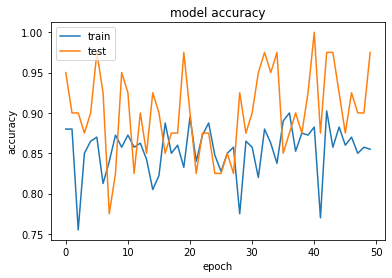

In [254]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

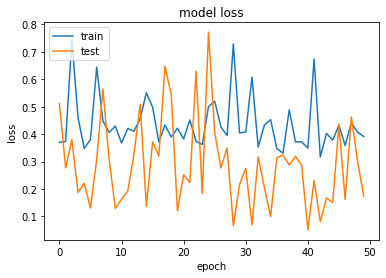

In [255]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [256]:
test = os.listdir(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test')
result = []
for j in test:
    img = image.load_img(r'C:\Users\hp\Desktop\chrome Download\asl_alphabet_test\asl_alphabet_test\{}'.format(j), target_size=(200, 200,1))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    result.append(classes[0])

In [257]:
actual = []
for i in test:
    name = i.split('_')[0]
    num = train_generator.class_indices[name]
    actual.append(num)

In [258]:
cnn_confusion_matrix = confusion_matrix(actual,result)
c_r = classification_report(np.array(actual),np.array(result))
print(c_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [259]:
print(cnn_confusion_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

In [269]:
model.save('Model3.h5')
model.save_weights('Model3_weight.h5')

# TEST THE MODEL AND USE IT WITH OPENCV

In [118]:
model = keras.models.load_model(r'C:\Users\hp\Desktop\sign-language\Model3.h5')

In [35]:
dic_alpha = {0: 'A',1: 'B',2: 'C',3: 'D',4: 'E',5: 'F',6: 'G',7: 'H',8: 'I',9: 'J',10: 'K',11: 'L',12: 'M',
             13: 'N',14: 'O',15: 'P',16: 'Q',17: 'R',18: 'S',19: 'T',20: 'U',21: 'V',22: 'W',23: 'X',24: 'Y',
             25: 'Z',26: 'del',27: 'nothing',28: 'space',29: 'stop'}

# start to make a translator

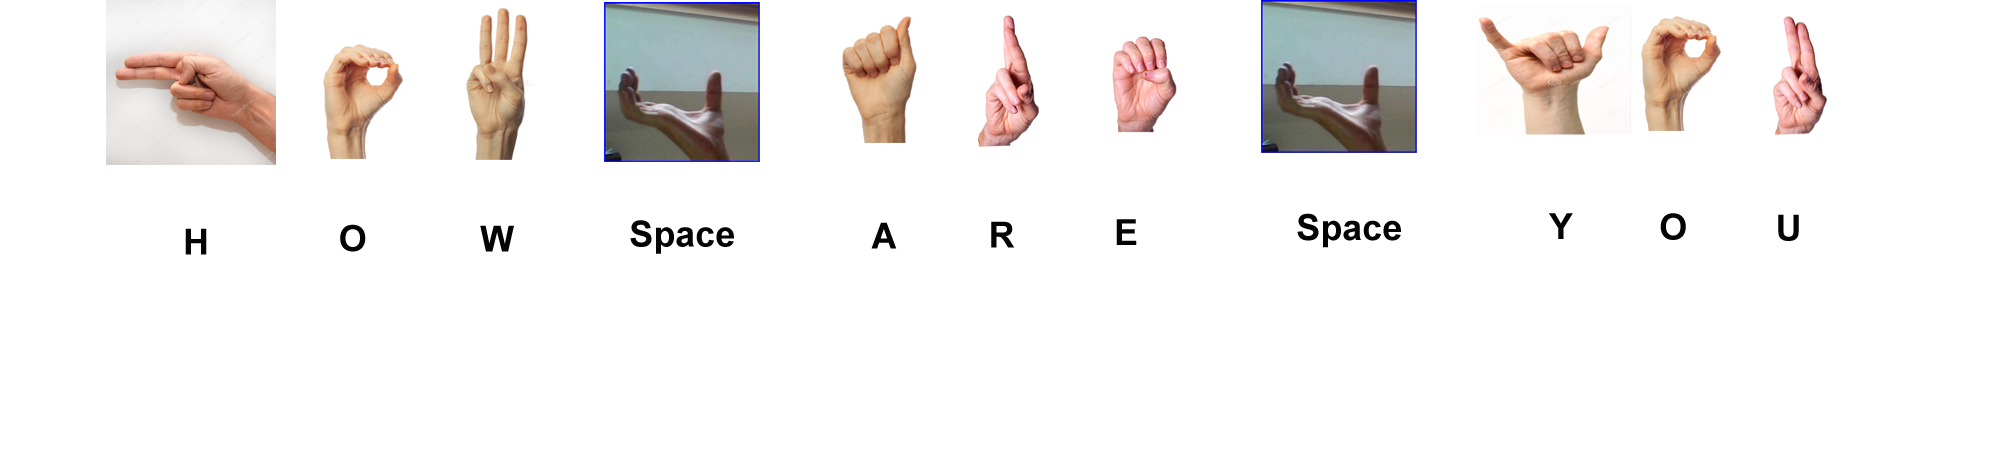

In [105]:
from textblob import TextBlob, Word 
from IPython.display import Image
Image("ASL.png")

In [119]:
test = os.listdir(r"C:\Users\hp\Desktop\sign-language\test")

In [120]:
sen = ""
for file in test:
    img = image.load_img(r"C:\Users\hp\Desktop\sign-language\test\{}".format(file), target_size=(200, 200,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    alpha = dic_alpha[classes[0]]
    if alpha == "space":
        sen += " "
    else:
        sen += alpha
text = sen
print(text)

HOW ARE YOU


# IMPORT SEQ2SEQ MODEL 

I have already created seq2seq chatbot model you can check the code here https://github.com/AbdulSamadFarshori/Seq2Seq_chatbot

In [184]:
encoder = keras.models.load_model(r'C:\Users\hp\Desktop\sign-language\encoder.h5')
decoder = keras.models.load_model(r'C:\Users\hp\Desktop\sign-language\decoder.h5')

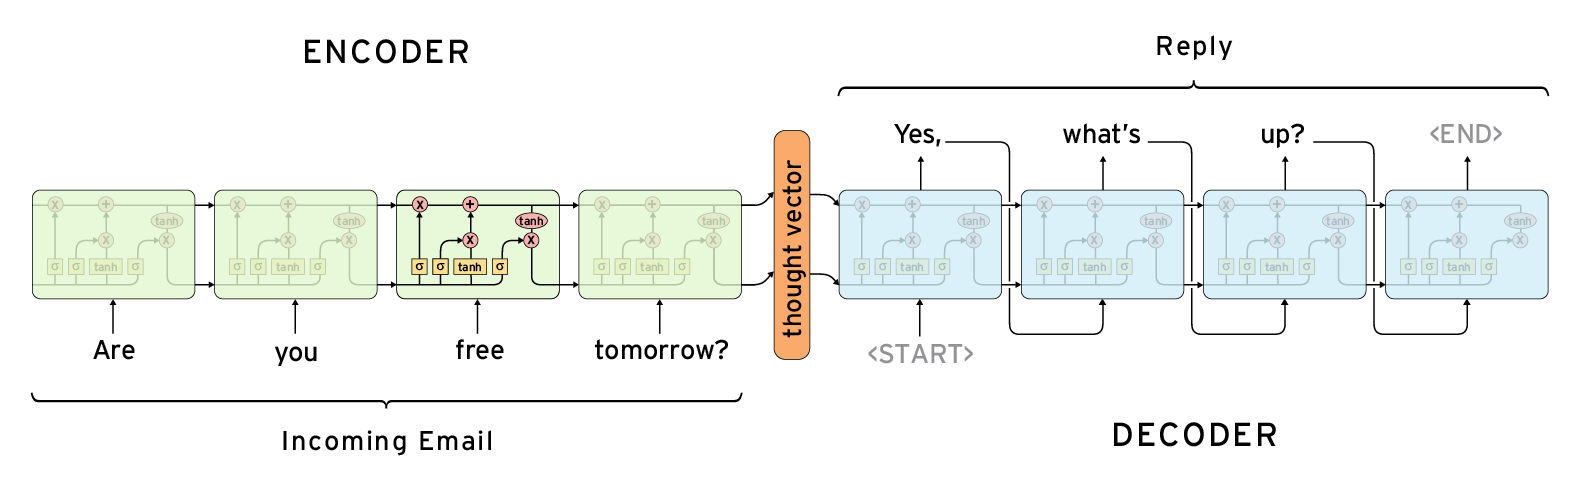

In [123]:
Image("seq2seq.png")

# import the dictionary of words tokenizer

In [185]:
dic = {}
jo = 0
with open("dict.txt", 'r') as f:
    file = f.read()
    foo_ = list(file.split(","))
    #print(foo_)
    for i in foo_:
        jo += 1
        foo1_ = i.split(":")
        #print(foo1_)
        if len(foo_) > jo:
            dic[foo1_[0]] = int(foo1_[1])

In [186]:
maxlen_ask = 11
maxlen_reply = 19

def str_to_token(sentence:str):
    words = sentence.lower().split()
    token_list = []
    for word in words:
        token_list.append(dic[word])
    return keras.preprocessing.sequence.pad_sequences([token_list], maxlen=maxlen_ask, padding='post')


In [189]:
enc_model, dec_model = make_inference()


for _ in range(1):
    ask=''
    input_user=text.lower()
    split_input=input_user.split(' ')
    for i in range(len(split_input)):
        if split_input[i] not in tokenizer.word_index:
            unk_word=split_input[i]
            split_input[i]= 'ukn'
        ask +=split_input[i]+' '
    state_value = enc_model.predict(str_to_token(ask))
    empty_target_seq = np.zeros((1,1))
    empty_target_seq[0,0] = tokenizer.word_index['<sos>']
    stop_condition =False
    decoded_translation = ''
    while not stop_condition:
        dec_output, h, c = dec_model.predict([empty_target_seq]+state_value)
        sample_word_index = np.argmax(dec_output[0,-1,:])
        ##print(dec_output[0,-1,:])
        sample_word = None
        for word, index in tokenizer.word_index.items():
            if sample_word_index == index:
                decoded_translation += ' {}' .format(word)
                sample_word = word
          
        if sample_word == '<eos>' or len(decoded_translation.split())> maxlen_reply:
            stop_condition = True

        empty_target_seq =np.zeros((1,1))
        empty_target_seq[0,0] = sample_word_index
        state_value = [h,c]
    print('chatbot:{}'.format(decoded_translation))

chatbot: i am good and you eos
